# 7: サイモンアルゴリズム

In [1]:
from renom_q import *

サイモン問題とは、$n$ビット変数$x$に対して$n$ビット関数$f(x)$があり、
$$$$$$f(x) = f(x \oplus s)$$$$$$
を満たす秘密キー$s$があることが約束されており、関数$f(x)$へできるだけ少ない問い合わせ量で0位外の秘密キー$s$を見つけ出す問題である。
$$x \oplus s = (x_0 \oplus s_0, x_1 \oplus s_1, \dots, x_{n-1} \oplus s_{n-1})$$

$$\left| x_0 x_1 \right\rangle\left| 00 \right\rangle \xrightarrow{U_f} \left| x_0 x_1 \right\rangle\left| 00 \oplus f(x_0 x_1) \right\rangle = \left| x_0 x_1 \right\rangle\left| f(x_0 x_1) \right\rangle$$

$n=2$のとき、0以外の秘密キー$s$を持った関数表は次のようになる。関数値は任意である。

- $s=01$の場合

|入力 $x$|　関数 $f(x)$|
|:-:|:-:|
|00|1|
|01|1|
|10|0|
|11|0|

- $s=10$の場合

|入力 $x$|　関数 $f(x)$|
|:-:|:-:|
|00|1|
|01|2|
|10|1|
|11|2|

- $s=11$の場合

|入力 $x$|　関数 $f(x)$|
|:-:|:-:|
|00|1|
|01|3|
|10|3|
|11|1|

## 7-1: 秘密キー$s=3=11_{(2)}$の場合

{'00': 480, '11': 544}


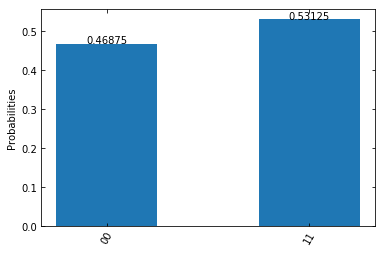

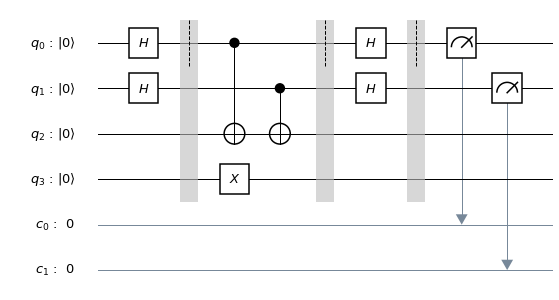

In [2]:
def s_oracle(qci, x0, x1, f_x0, f_x1):
    qci.x(f_x1)
    qci.cx(x0, f_x0)
    qci.cx(x1, f_x0)
    
bn = 4
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

for i in range(2):
    qc.h(q[i])
qc.barrier()
s_oracle(qc, q[0], q[1], q[2], q[3])
qc.barrier()
for i in range(2):
    qc.h(q[i])
qc.barrier()    
for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

$\left| y \right\rangle = \left| 00 \right\rangle$と$\left| y \right\rangle = \left| 11 \right\rangle$が観測されたが、$\left| 11 \right\rangle$のとき、次の式より秘密キー$s$が求められる。

$$y \cdot s = (y_0 s_0) \oplus (y_1 s_1) = 0$$

$$\rightarrow s=11$$

## 7-2: 秘密キー$s=1=01_{(2)}$の場合

{'00': 522, '10': 502}


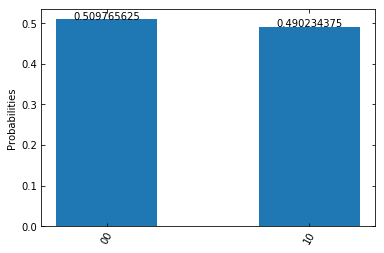

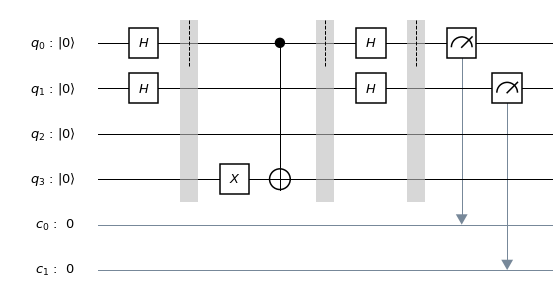

In [3]:
def s_oracle(qci, x0, x1, f_x0, f_x1):
    qci.x(f_x1)
    qci.cx(x0, f_x1)
    
bn = 4 
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

for i in range(2):
    qc.h(q[i])
qc.barrier()
s_oracle(qc, q[0], q[1], q[2], q[3])
qc.barrier()
for i in range(2):
    qc.h(q[i])
qc.barrier()    
for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

$\left| y \right\rangle = \left| 00 \right\rangle$と$\left| y \right\rangle = \left| 10 \right\rangle$が観測されたが、$\left| 10 \right\rangle$のとき、次の式より秘密キー$s$が求められる。

$$y \cdot s = (y_0 s_0) \oplus (y_1 s_1) = 0$$

$$\rightarrow s=01$$

## 7-3: 秘密キー$s=2=10_{(2)}$の場合

{'00': 512, '01': 512}


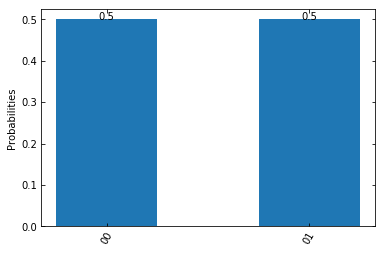

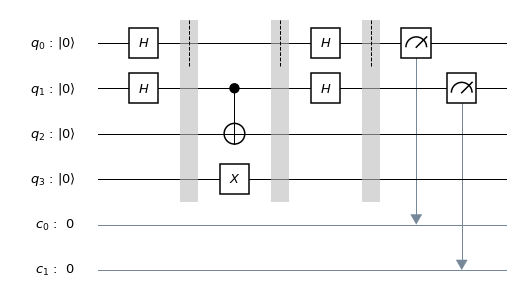

In [4]:
def s_oracle(qci, x0, x1, f_x0, f_x1):
    qci.x(f_x1)
    qci.cx(x1, f_x0)
    
bn = 4
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

for i in range(2):
    qc.h(q[i])
qc.barrier()
s_oracle(qc, q[0], q[1], q[2], q[3])
qc.barrier()
for i in range(2):
    qc.h(q[i])
qc.barrier()    
for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

$\left| y \right\rangle = \left| 00 \right\rangle$と$\left| y \right\rangle = \left| 01 \right\rangle$が観測されたが、$\left| 01 \right\rangle$のとき、次の式より秘密キー$s$が求められる。

$$y \cdot s = (y_0 s_0) \oplus (y_1 s_1) = 0$$

$$\rightarrow s=10$$